In [93]:
import pandas as pd

student_data = pd.read_csv('Data/students_performance.csv', sep=',')
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


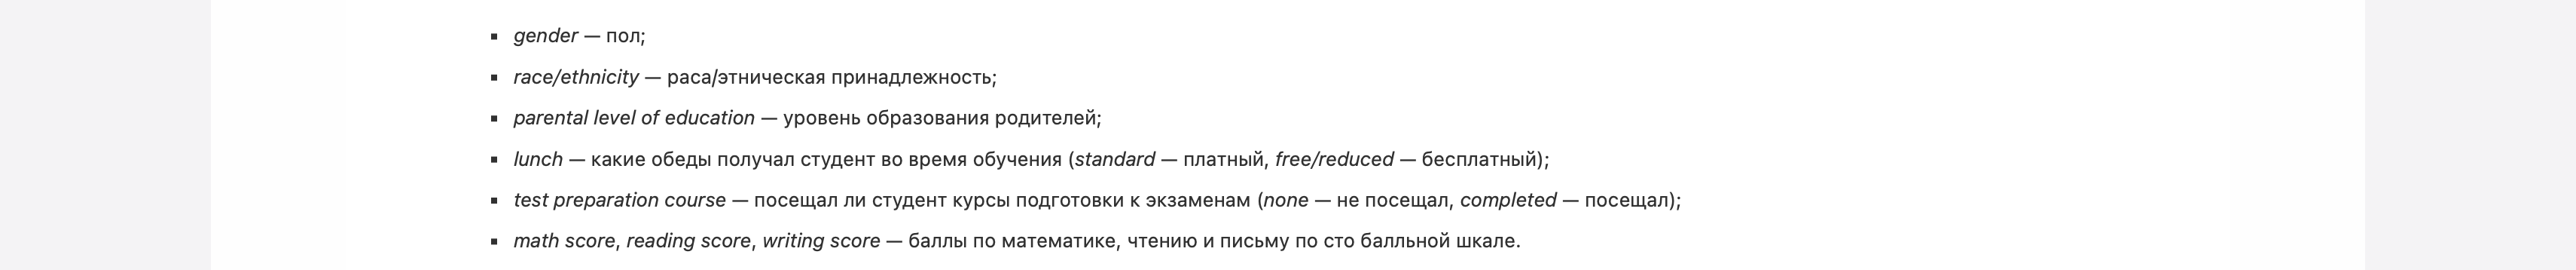

In [94]:
# Данные о скольких студентах содержатся в таблице?
student_data.shape[0]

1000

In [96]:
# Каков балл по письму у студента под индексом 155?
student_data.iloc[155]['writing score']

88

In [157]:
# Сколько суммарно пропущенных значений в таблице?
student_data.isnull().sum().sum()

0

In [158]:
# Сколько столбцов в таблице имеет тип данных object?
(student_data.dtypes == 'object').sum()


5

In [114]:
# Какой объём памяти (в килобайтах) занимает таблица?
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [116]:
# Каков у студентов средний балл по математике?
student_data['math score'].mean()

66.089

In [117]:
# Какая расовая группа является самой крупной в учебном заведении?
# В качестве ответа введите идентификатор группы (A, B, C, D, F).
student_data['race/ethnicity'].mode()

0    group C
Name: race/ethnicity, dtype: object

In [119]:
# Каков средний балл по чтению у студентов, которые посещали курсы подготовки к экзаменам?
# Округлите ответ до целого числа.

mask_3 = student_data['test preparation course'] == 'completed'
round(student_data[mask_3]['reading score'].mean())


74

In [120]:
# Сколько студентов получили 0 баллов по математике?

mask_4 = student_data['math score'] == 0
student_data[mask_4].shape[0]

1

In [126]:
# Проверьте гипотезу: у студентов с оплачиваемым питанием средний балл по математике выше, чем у студентов с льготным питанием.
# В качестве ответа напишите наибольший средний балл по математике среди этих групп студентов.
# Округлите ответ до целого числа.

mask_lunch_yes = student_data['lunch'] == 'standard'
mask_lunch_no = student_data['lunch'] == 'free/reduced'
math_1 = student_data[mask_lunch_yes]['math score'].mean()
math_2 = student_data[mask_lunch_no]['math score'].mean()
display(round(math_1), round(math_2))





70

59

In [134]:
# Каков процент студентов, родители которых имеют высшее образование уровня бакалавриата (bachelor's degree)?
# Округлите ответ до целого числа.
# Не указывайте знак %.

mask_5 = student_data["parental level of education"] == "bachelor's degree"
bachelor = student_data[mask_5].shape[0]
print(round((bachelor / student_data.shape[0])*100))


12


In [156]:
# Насколько медианный балл по письму у студентов в расовой группе А отличается от среднего балла по письму у студентов в расовой группе C?
# Округлите ответ до целого и запишите модуль этого числа.

mask_mediane_A = student_data[(student_data['race/ethnicity'] == 'group A')]['writing score'].median()
mask_mean_C = student_data[(student_data['race/ethnicity'] == 'group C')]['writing score'].mean()
display(round(abs(mask_mediane_A - mask_mean_C)))

6